In [1]:
!pip install chembl_webresource_client
!pip install rdkit
!pip install numpy pandas openpyxl
!pip install torch 

In [75]:
# Import necessary libraries for data preparation and model implementation
import numpy as np
import pandas as pd 
from chembl_webresource_client.new_client import new_client
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from rdkit import Chem
from IPython.display import Image, display

In [80]:
# Data preparation
df = pd.read_excel('Drugs_ChEMBL.xlsx', usecols=[0])
df_split = df[df.columns[0]].str.split(';', expand=True)
smiles = df_split.iloc[:, 31].tolist()
smiles = [item for item in smiles if item is not None]
# Removin the double quotes at the beginning and end of smiles notation
smiles = [x[1:-1] for x in smiles if x]

In [4]:
df_split

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,CHEMBL3943366,"""""","""""","""Small molecule""","""""","""342.46""","""7""","""8""","""2.46""","""49.41""",...,"""-1.75""","""NEUTRAL""","""C19H22N2O2S""","""C#CCN1CCCC(CNS(=O)(=O)c2ccc3ccccc3c2)C1""","""UWQSVNKQBCCLCY-UHFFFAOYSA-N""","""InChI=1S/C19H22N2O2S/c1-2-11-21-12-5-6-16(15-...",None,None,None,None
1,CHEMBL5268446,"""""","""""","""""","""""","""393.49""","""6""","""9""","""2.85""","""81.67""",...,"""-0.79""","""BASE""","""C23H27N3O3""","""O=C(/C=C/c1cccc(C(=O)NCC2CCN(Cc3ccccc3)CC2)c1...","""YABXTJHVSPTPJO-MDZDMXLPSA-N""","""InChI=1S/C23H27N3O3/c27-22(25-29)10-9-18-7-4-...",None,None,None,None
2,CHEMBL5269968,"""""","""""","""""","""""","""232.24""","""1""","""2""","""1.78""","""59.67""",...,"""1.20""","""NEUTRAL""","""C13H12O4""","""COc1cccc2oc3c(c(=O)c12)[C@@H](O)CC3""","""FJHNKNQLVUWEET-ZETCQYMHSA-N""","""InChI=1S/C13H12O4/c1-16-8-3-2-4-9-12(8)13(15)...",None,None,None,None
3,CHEMBL193634,"""""","""""","""Small molecule""","""""","""340.39""","""4""","""8""","""4.50""","""46.53""",...,"""-0.27""","""ACID""","""C21H21FO3""","""O=C(O)C1(c2ccc(-c3ccc(C4CCOCC4)cc3)c(F)c2)CC1""","""KSEFZMXVRTYGAP-UHFFFAOYSA-N""","""InChI=1S/C21H21FO3/c22-19-13-17(21(9-10-21)20...",None,None,None,None
4,CHEMBL194692,"""""","""""","""Small molecule""","""""","""326.29""","""4""","""8""","""4.87""","""37.30""",...,"""-0.71""","""ACID""","""C17H14F4O2""","""CC(C)(C(=O)O)c1ccc(-c2ccc(C(F)(F)F)cc2)c(F)c1""","""VENPPESRQUOIAN-UHFFFAOYSA-N""","""InChI=1S/C17H14F4O2/c1-16(2",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,CHEMBL38,"""TRETINOIN""","""ABEREL|ACTICIN|ALL-TRANS RETINOIC ACID|ALL-TR...","""Small molecule""","""4.0""","""300.44""","""849""","""2273""","""5.60""","""37.30""",...,"""2.31""","""ACID""","""C20H28O2""","""CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)C(C)(C)CCC1""","""SHGAZHPCJJPHSC-YCNIQYBTSA-N""","""InChI=1S/C20H28O2/c1-15(8-6-9-16(2)14-19(21)2...",None,None,None,None
4745,CHEMBL242948,"""POLAPREZINC""","""Carnosine|POLAPREZINC|Z 103|Z-103""","""Small molecule""","""2.0""","""226.24""","""31""","""114""","""-1.13""","""121.10""",...,"""0.01""","""ZWITTERION""","""C9H14N4O3""","""NCCC(=O)N[C@@H](Cc1c[nH]cn1)C(=O)O""","""CQOVPNPJLQNMDC-ZETCQYMHSA-N""","""InChI=1S/C9H14N4O3/c10-2-1-8(14)13-7(9(15)16)...",None,None,None,None
4746,CHEMBL169,"""URSOLIC ACID""","""MALOL|MICROMEROL|NSC-167406|NSC-4060|PRUNOL|U...","""Small molecule""","""2.0""","""456.71""","""213""","""948""","""7.09""","""57.53""",...,"""3.19""","""ACID""","""C30H48O3""","""C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC...","""WCGUUGGRBIKTOS-GPOJBZKASA-N""","""InChI=1S/C30H48O3/c1-18-10-15-30(25(32)33)17-...",None,None,None,None
4747,CHEMBL15192,"""LAPACHONE""",""".BETA.-LAPACHONE|ARQ 501|ARQ-501|BETA LAPACHO...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
len(smiles)

4700

In [6]:
smiles

['C#CCN1CCCC(CNS(=O)(=O)c2ccc3ccccc3c2)C1',
 'O=C(/C=C/c1cccc(C(=O)NCC2CCN(Cc3ccccc3)CC2)c1)NO',
 'COc1cccc2oc3c(c(=O)c12)[C@@H](O)CC3',
 'O=C(O)C1(c2ccc(-c3ccc(C4CCOCC4)cc3)c(F)c2)CC1',
 'CC(C)(C(=O)O)c1ccc(-c2ccc(C(F)(F)F)cc2)c(F)c1',
 'CC(c1ccc(-c2ccc(C(F)(F)F)cc2)c(F)c1)c1noc(O)n1',
 'C[C@@H]1NC(=O)[C@H](Cc2ccc(OCCCN3CCCCC3)cc2)NC1=O',
 'Oc1cc(/C=C/c2ccc(C(F)(F)C(F)F)cc2)ccc1/C=C/c1ccc(C(F)(F)C(F)F)cc1',
 'COc1cc(/C=C/c2ccc(CO)cc2)ccc1/C=C/c1ccc(CO)cc1',
 'Oc1ccc(/C=C/c2ccc(/C=C/c3ccc(O)cc3)c(C(F)(F)F)c2)cc1',
 'CCCSC(=O)/C=C/c1cc(O)ccc1O',
 'CC(O)c1cccc(-c2ccc([N+](=O)[O-])c(NCc3ccccc3)c2)c1',
 'CCN(CCCCCCn1nc(-c2cc(N(C)C)ccc2O)ccc1=O)Cc1cccc(F)c1',
 'CN(C)c1ccc(-c2nc3ccccc3c3cc4ccccn4c23)cc1',
 'CCN(CCCCCCOc1ccc(-c2cc(=O)c3c(O)c(OC)c(OC)cc3o2)cc1)Cc1ccccc1OC',
 'O=C(CN1CCN(CCCCCCOc2ccc3c(-c4ccccc4)cc(=O)oc3c2)CC1)Nc1c2c(nc3ccccc13)CCCC2',
 'CC(=O)O.COc1ccc(NC(C)=O)cc1C(=O)NNC(=O)[C@H](CCCCN)NC(=O)CCOC[C@H]1OC(OCCCNC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)OC(C)(C)C)C(C)C)[C@H](O)[C@@H](O)[

In [7]:
# Creating smiles vocabulary to further create one hot encodings
def create_smiles_vocabulary(smiles_list):
    unique_chars = set(''.join(smiles_list))
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    return char_to_index

In [9]:
char_to_index = create_smiles_vocabulary(smiles)
char_to_index

{'=': 0,
 '-': 1,
 'I': 2,
 'P': 3,
 'N': 4,
 '2': 5,
 '4': 6,
 'H': 7,
 '3': 8,
 'M': 9,
 ']': 10,
 '[': 11,
 'e': 12,
 'O': 13,
 '.': 14,
 'c': 15,
 'a': 16,
 ')': 17,
 'F': 18,
 '\\': 19,
 'B': 20,
 's': 21,
 '@': 22,
 '+': 23,
 '(': 24,
 '8': 25,
 '5': 26,
 'S': 27,
 '7': 28,
 '1': 29,
 'r': 30,
 'l': 31,
 'C': 32,
 '6': 33,
 '#': 34,
 'g': 35,
 'o': 36,
 'n': 37,
 '/': 38}

In [45]:
# Introducing end of smiles notation token and padding token
char_to_index['E'] = 39
char_to_index['*'] = 40
char_to_index

{'=': 0,
 '-': 1,
 'I': 2,
 'P': 3,
 'N': 4,
 '2': 5,
 '4': 6,
 'H': 7,
 '3': 8,
 'M': 9,
 ']': 10,
 '[': 11,
 'e': 12,
 'O': 13,
 '.': 14,
 'c': 15,
 'a': 16,
 ')': 17,
 'F': 18,
 '\\': 19,
 'B': 20,
 's': 21,
 '@': 22,
 '+': 23,
 '(': 24,
 '8': 25,
 '5': 26,
 'S': 27,
 '7': 28,
 '1': 29,
 'r': 30,
 'l': 31,
 'C': 32,
 '6': 33,
 '#': 34,
 'g': 35,
 'o': 36,
 'n': 37,
 '/': 38,
 'E': 39,
 '*': 40}

In [46]:
vocab=char_to_index
vocab_size = len(vocab)
vocab_size

41

In [47]:
index_to_char = {idx: char for char, idx in char_to_index.items()}
index_to_char

{0: '=',
 1: '-',
 2: 'I',
 3: 'P',
 4: 'N',
 5: '2',
 6: '4',
 7: 'H',
 8: '3',
 9: 'M',
 10: ']',
 11: '[',
 12: 'e',
 13: 'O',
 14: '.',
 15: 'c',
 16: 'a',
 17: ')',
 18: 'F',
 19: '\\',
 20: 'B',
 21: 's',
 22: '@',
 23: '+',
 24: '(',
 25: '8',
 26: '5',
 27: 'S',
 28: '7',
 29: '1',
 30: 'r',
 31: 'l',
 32: 'C',
 33: '6',
 34: '#',
 35: 'g',
 36: 'o',
 37: 'n',
 38: '/',
 39: 'E',
 40: '*'}

In [48]:
smiles1=smiles
smiles=smiles[:300]

In [49]:
def smiles_to_one_hot(smiles_string, char_to_index, vocab_size, max_length):
    smiles_string += 'E'
    smiles_indices = [char_to_index[char] for char in smiles_string]
    if len(smiles_indices) < max_length:
        smiles_indices += [char_to_index['*']] * (max_length - len(smiles_indices))
    else:
        smiles_indices = smiles_indices[:max_length]
    
    one_hot_tensor = torch.zeros(max_length, vocab_size)
    for i, index in enumerate(smiles_indices):
        one_hot_tensor[i, index] = 1
    
    return one_hot_tensor

def batch_smiles_to_one_hot(smiles_list, char_to_index, vocab_size):
    max_length = max(len(smiles) for smiles in smiles_list) + 1  # +1 for the 'E' character
    one_hot_tensors = [smiles_to_one_hot(smiles, char_to_index, vocab_size, max_length) for smiles in smiles_list]
    batch_one_hot = torch.stack(one_hot_tensors)
    
    return batch_one_hot

batch_one_hot = batch_smiles_to_one_hot(smiles, char_to_index, vocab_size)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sarthak\AppData\Local\Temp\ipykernel_7460\2802050836.py:1: SyntaxWarning: invalid escape sequence '\p'
  display(Image(filename='C:\python_jupyter\PED_Model.png'))


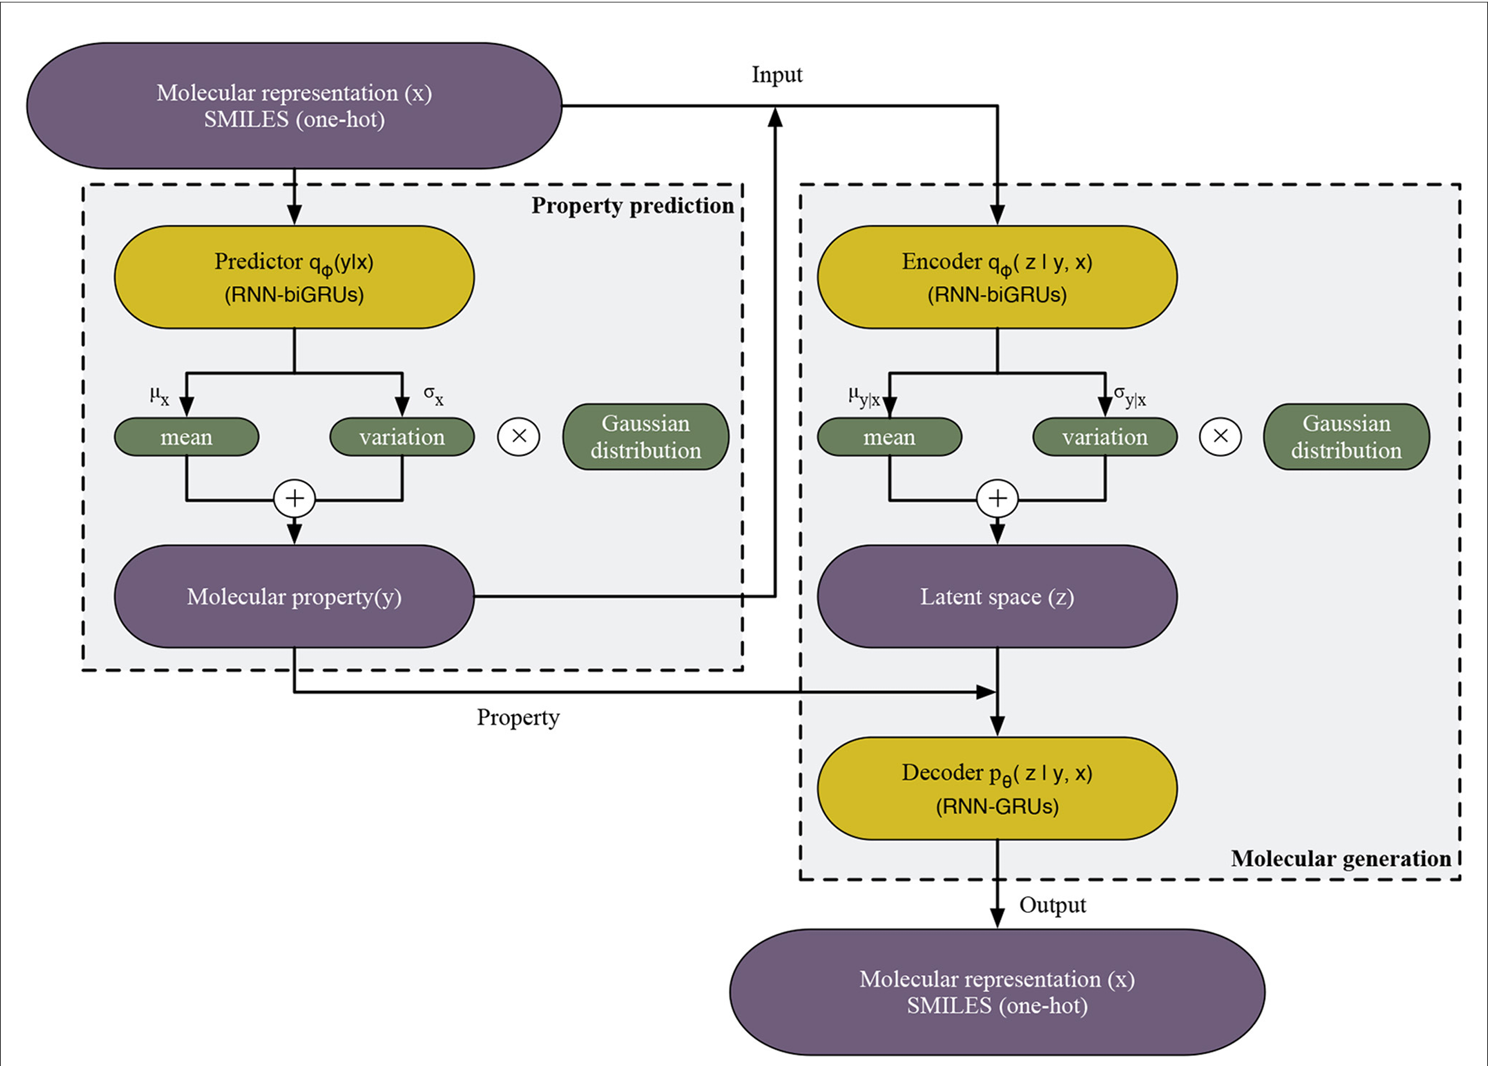

In [76]:
display(Image(filename='C:\python_jupyter\PED_Model.png'))

In [18]:
# Define the PEDModel class
class PEDModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PEDModel, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.predictor_gru = nn.GRU(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.encoder_gru = nn.GRU(hidden_dim * 2, hidden_dim, bidirectional=True, batch_first=True)
        self.decoder_gru = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        
        self.hidden2mean = nn.Linear(hidden_dim * 2, hidden_dim)
        self.hidden2logvar = nn.Linear(hidden_dim * 2, hidden_dim)
        
        self.hidden2property = nn.Linear(hidden_dim * 2, output_dim)
        self.hidden2output = nn.Linear(hidden_dim, input_dim)
        self.softmax = nn.Softmax(dim=-1)
    
    def forward(self, x):
        predictor_output, _ = self.predictor_gru(x)
        predictor_output = predictor_output[:, -1, :]
        
        encoder_output, _ = self.encoder_gru(predictor_output.unsqueeze(1))
        encoder_output = encoder_output[:, -1, :]
        
        mu = self.hidden2mean(encoder_output)
        logvar = self.hidden2logvar(encoder_output)
        std = torch.exp(0.5 * logvar)
        z = mu + std * torch.randn_like(std)
        
        decoder_input = z.unsqueeze(1).repeat(1, x.size(1), 1)
        decoder_output, _ = self.decoder_gru(decoder_input)
        
        x_recon = self.softmax(self.hidden2output(decoder_output))
        y_pred = self.hidden2property(encoder_output)
        
        return y_pred, mu, logvar, x_recon

In [62]:
# Hyperparameters
input_dim = vocab_size
hidden_dim = 100
output_dim = 1
num_epochs = 50
learning_rate = 0.001

In [63]:
# Using device GPU to train the model faster
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [64]:
# Example property values for the list of SMILES strings
property_values = torch.rand(len(smiles), 1)

In [65]:
# Initialize model, loss functions, and optimizer
model = PEDModel(input_dim, hidden_dim, output_dim).to(device)
criterion_pred = nn.MSELoss()
criterion_recon = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

batch_one_hot = batch_one_hot.to(device)
property_values = property_values.to(device)

In [67]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    y_pred, mu, logvar, z = model(batch_one_hot)
    
    # Compute losses
    loss_pred = criterion_pred(y_pred, property_values)
    loss_kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss = loss_pred + loss_kl
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/50], Loss: 0.1406
Epoch [20/50], Loss: 0.1213
Epoch [30/50], Loss: 0.1072
Epoch [40/50], Loss: 0.0983
Epoch [50/50], Loss: 0.0931


In [68]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred, mu, logvar, x_recon = model(batch_one_hot)
    print(f'Predicted Property Values: {y_pred.squeeze().cpu().numpy()}')
    print(x_recon.shape)
    for i in range(len(smiles)):
        predicted_smiles = ''.join([index_to_char[idx] for idx in torch.argmax(x_recon[i], dim=1).cpu().numpy()])
        print(f'Original SMILES: {smiles[i]}, Predicted SMILES: {predicted_smiles}')

Predicted Property Values: [0.41606325 0.41606328 0.41606325 0.41606322 0.41606322 0.41606325
 0.41606328 0.41606325 0.41606325 0.41606325 0.41606328 0.41606325
 0.41606325 0.41606325 0.41606325 0.41606325 0.41606325 0.41606322
 0.41606325 0.41606328 0.41606325 0.41606328 0.41606328 0.41606328
 0.41606325 0.41606325 0.41606325 0.41606325 0.41606325 0.41606328
 0.41606322 0.41606325 0.41606325 0.41606322 0.41606325 0.41606325
 0.41606325 0.41606325 0.41606328 0.41606325 0.41606328 0.41606325
 0.41606328 0.41606325 0.41606325 0.41606325 0.41606325 0.41606325
 0.41606325 0.40598    0.40633276 0.41606325 0.41606325 0.41606325
 0.41606328 0.41606325 0.41606325 0.41606328 0.41606325 0.41606325
 0.41606325 0.41606328 0.41606328 0.41606325 0.41606328 0.41606325
 0.41606325 0.41606325 0.41606328 0.41606325 0.41606325 0.41606328
 0.41606325 0.41606325 0.41606322 0.41606325 0.41606325 0.41606325
 0.41606325 0.41606325 0.41606325 0.41606325 0.41606328 0.41606325
 0.41606325 0.41606328 0.41606325 0

In [69]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred, mu, logvar, x_recon = model(batch_one_hot)
    print(f'Predicted Property Values: {y_pred.squeeze().cpu().numpy()}')
    print(f'x_recon shape: {x_recon.shape}')
    
    # Ensure x_recon has the correct shape and dimension
    if x_recon.dim() == 2:  # If x_recon is (num_tokens, vocab_size)
        # Find indices of max values along the vocab size dimension
        predicted_indices = torch.argmax(x_recon, dim=1)
        predicted_smiles = ''.join([index_to_char[idx.item()] for idx in predicted_indices.cpu()])
        print(f'Predicted SMILES: {predicted_smiles}')
    else:
        raise ValueError("x_recon should be a 2D tensor with shape (num_tokens, vocab_size)")

# In case x_recon should be a batch of sequences
# If x_recon is supposed to be (batch_size, seq_length, vocab_size), adjust accordingly
if x_recon.dim() == 3:  # If x_recon is (batch_size, seq_length, vocab_size)
    for i in range(x_recon.size(0)):
        predicted_indices = torch.argmax(x_recon[i], dim=1)
        predicted_smiles = ''.join([index_to_char[idx.item()] for idx in predicted_indices.cpu()])
        print(f'Original SMILES: {smiles[i]}, Predicted SMILES: {predicted_smiles}')
else:
    raise ValueError("x_recon should be a 3D tensor with shape (batch_size, seq_length, vocab_size)")


Predicted Property Values: [0.41606325 0.41606328 0.41606325 0.41606322 0.41606322 0.41606325
 0.41606328 0.41606325 0.41606325 0.41606325 0.41606328 0.41606325
 0.41606325 0.41606325 0.41606325 0.41606325 0.41606325 0.41606322
 0.41606325 0.41606328 0.41606325 0.41606328 0.41606328 0.41606328
 0.41606325 0.41606325 0.41606325 0.41606325 0.41606325 0.41606328
 0.41606322 0.41606325 0.41606325 0.41606322 0.41606325 0.41606325
 0.41606325 0.41606325 0.41606328 0.41606325 0.41606328 0.41606325
 0.41606328 0.41606325 0.41606325 0.41606325 0.41606325 0.41606325
 0.41606325 0.40598    0.40633276 0.41606325 0.41606325 0.41606325
 0.41606328 0.41606325 0.41606325 0.41606328 0.41606325 0.41606325
 0.41606325 0.41606328 0.41606328 0.41606325 0.41606328 0.41606325
 0.41606325 0.41606325 0.41606328 0.41606325 0.41606325 0.41606328
 0.41606325 0.41606325 0.41606322 0.41606325 0.41606325 0.41606325
 0.41606325 0.41606325 0.41606325 0.41606325 0.41606328 0.41606325
 0.41606325 0.41606328 0.41606325 0

ValueError: x_recon should be a 2D tensor with shape (num_tokens, vocab_size)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sarthak\AppData\Local\Temp\ipykernel_7460\669324593.py:1: SyntaxWarning: invalid escape sequence '\p'
  display(Image(filename='C:\python_jupyter\Compounds generated using PED model.png'))


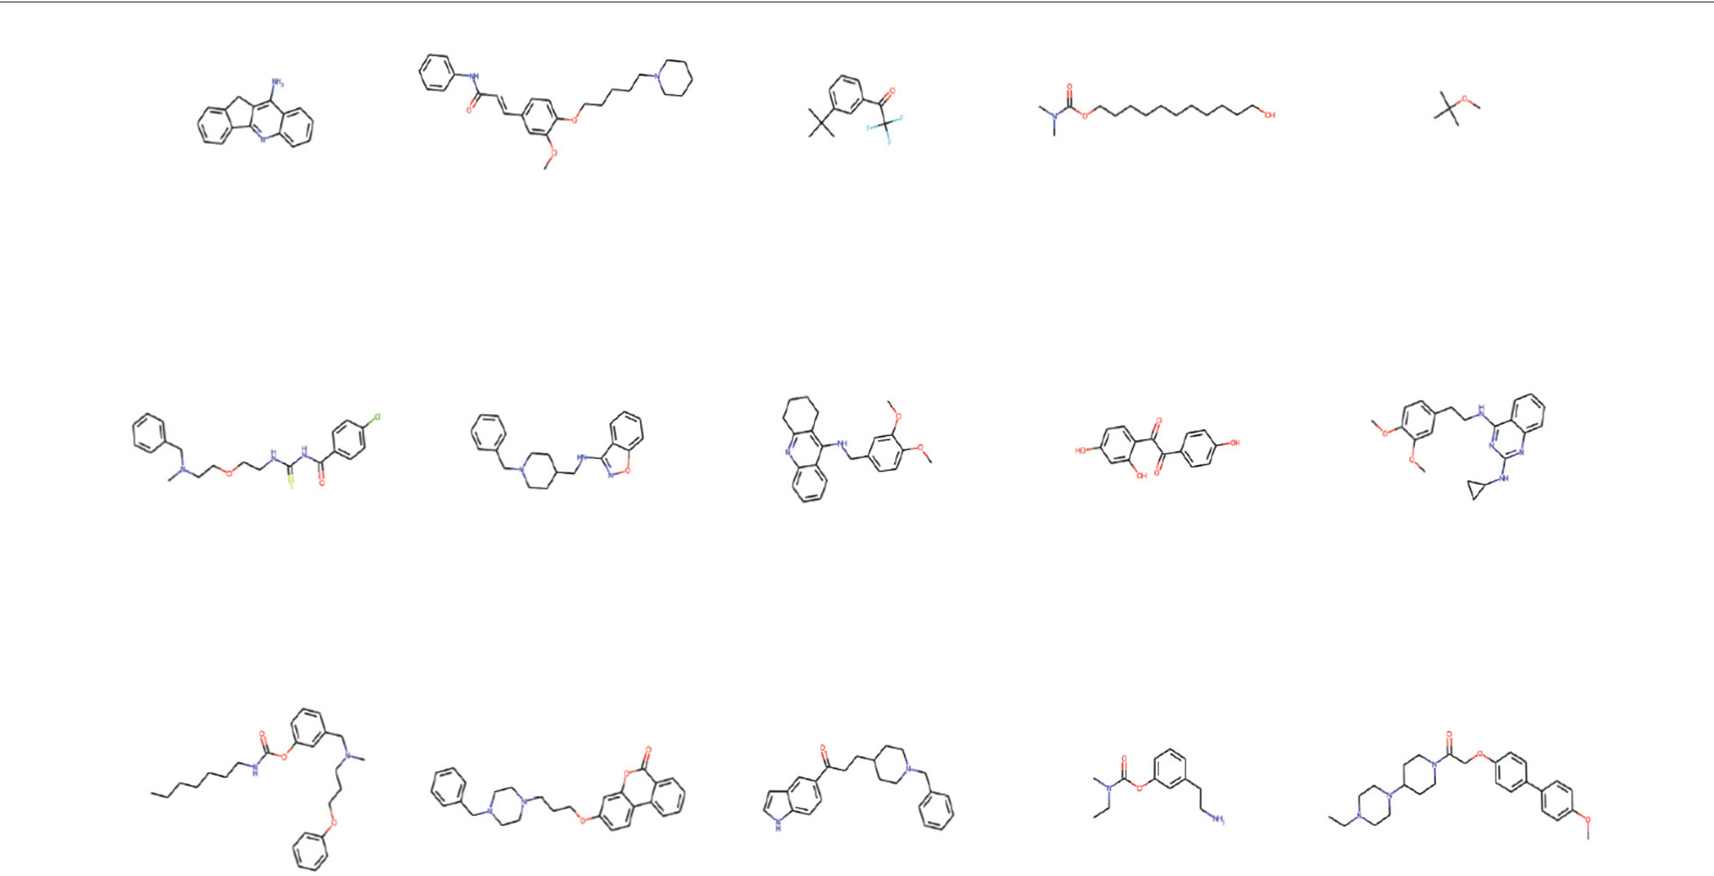

In [77]:
display(Image(filename='C:\python_jupyter\Compounds generated using PED model.png'))

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sarthak\AppData\Local\Temp\ipykernel_7460\1131223207.py:1: SyntaxWarning: invalid escape sequence '\p'
  display(Image(filename='C:\python_jupyter\Similarity to Donepezil.png'))


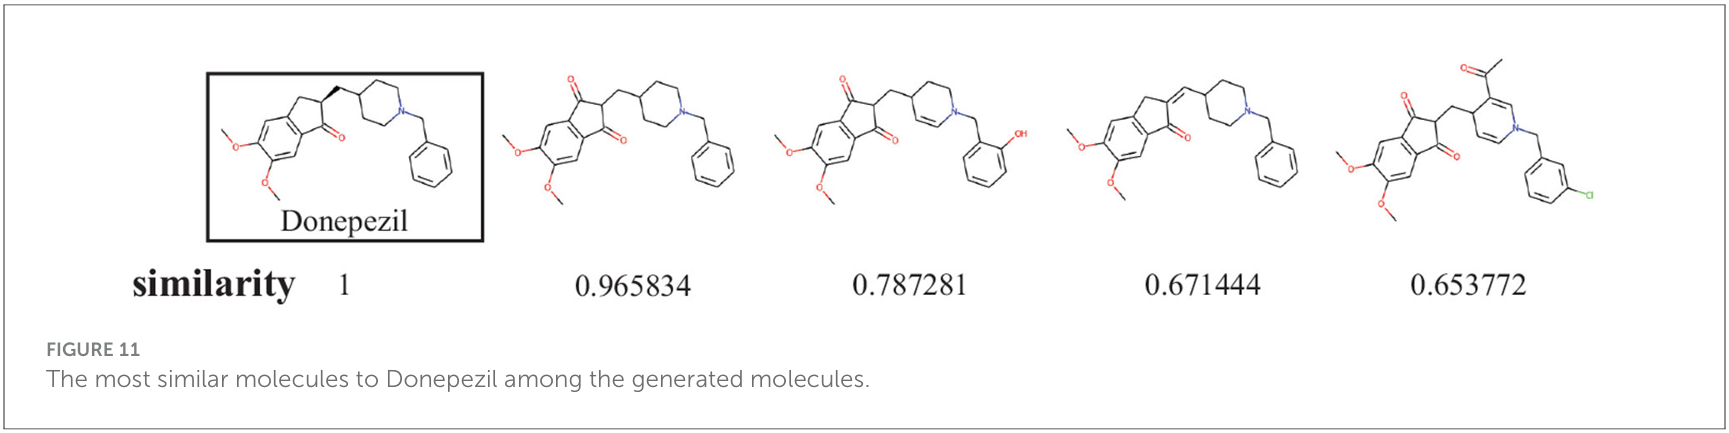

In [78]:
display(Image(filename='C:\python_jupyter\Similarity to Donepezil.png'))

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sarthak\AppData\Local\Temp\ipykernel_7460\3665755259.py:1: SyntaxWarning: invalid escape sequence '\p'
  display(Image(filename='C:\python_jupyter\Molecular Docking Results.png'))


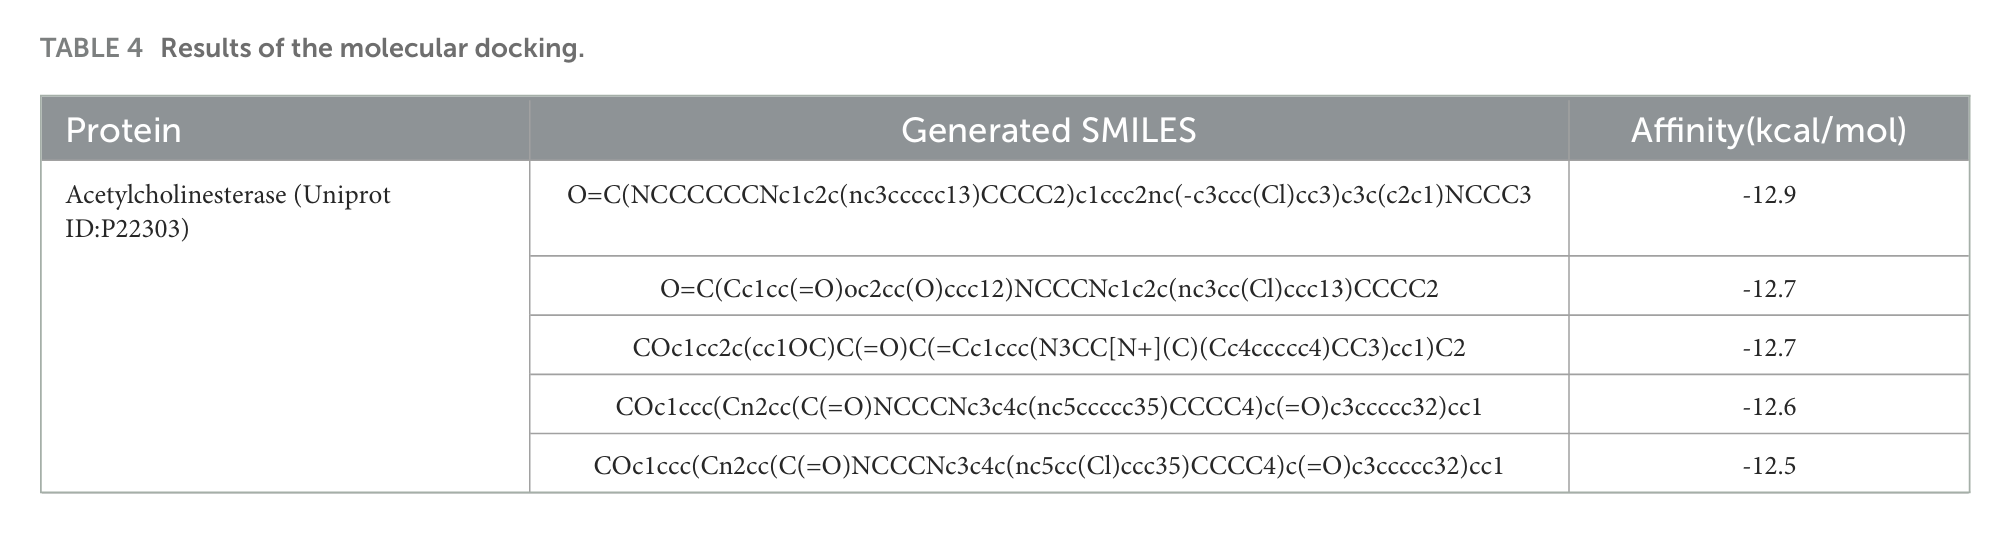

In [79]:
display(Image(filename='C:\python_jupyter\Molecular Docking Results.png'))